# **Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

# **Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
Age: Positive Integer variable of the reviewers age.
Title: String variable for the title of the review.
Review Text: String variable for the review body.
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.

# **Acknowledgements**

Anonymous but real source

# **Inspiration**

I look forward to come quality NLP! There is also some great opportunities for feature engineering, and multivariate analysis.

## Publications

Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network

# Import from Libraries

In [1]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Uploading files

In [2]:
data = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [5]:
data.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


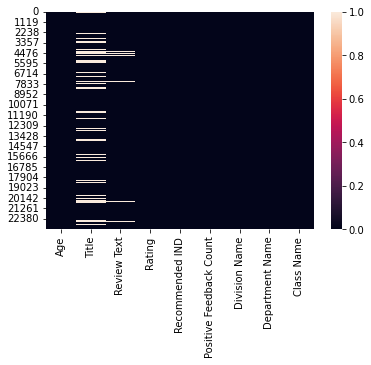

In [7]:
sns.heatmap(data.isnull());

In [8]:
data.isnull().sum(axis=0)

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
data.dropna(axis=0, inplace=True)

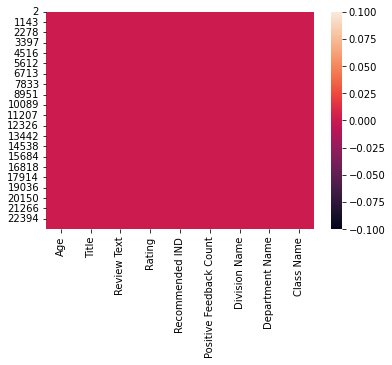

In [10]:
sns.heatmap(data.isnull());

In [11]:
data = data.rename(columns = {'Review Text' : 'text', 'Recommended IND' : 'Recommended', 'Positive Feedback Count' : 'Feedback_Count',
                          'Division Name' : 'Division', 'Department Name' : 'Department', 'Class Name' :'class'})

In [12]:
data[~data.isnull()]

,Age,Title,text,Rating,Recommended,Feedback_Count,Division,Department,class
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [13]:
data.describe()

,Age,Rating,Recommended,Feedback_Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


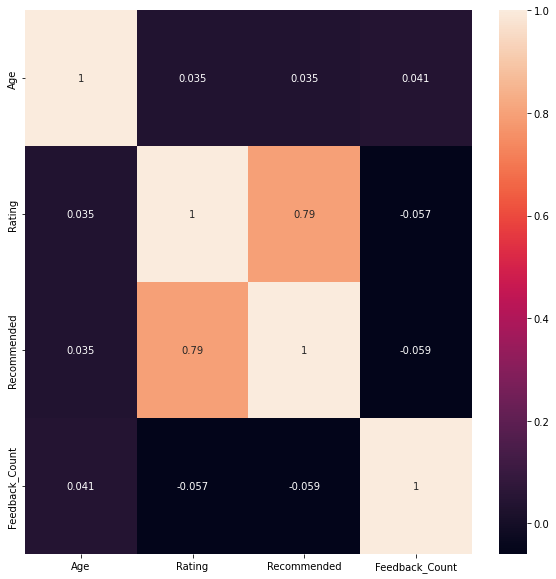

In [14]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [15]:
g1 = [go.Box(y=data.Rating,name="Rating",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=data.Feedback_Count,name="Positive Feedback Count",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]
layout1 = go.Layout(title="Positive Feedback Coun / Rating",yaxis=dict(range=[0,13])) 
fig1 = go.Figure(data=g1+g2,layout=layout1)
iplot(fig1)

# Analyzing

* **Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.**

In [16]:
fig2 = px.histogram(data,x='Recommended',color='Recommended',template='plotly_dark')
fig2.show()

 * **Division Name: Categorical name of the product high level division.**

In [17]:
fig2 = px.histogram(data,x='Division',color='Division',template='plotly_dark')
fig2.show()

* **Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.**

In [18]:
fig2 = px.histogram(data,x='Rating',color='Rating',template='plotly_dark')
fig2.show()

* **Department Name: Categorical name of the product department name.**

In [19]:
fig2 = px.histogram(data,x='Department',color='Department',template='plotly_dark')
fig2.show()

* **Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.**

In [20]:
fig2 = px.histogram(data,x='Feedback_Count',color='Feedback_Count',template='plotly_dark')
fig2.show()

* **Class Name: Categorical name of the product class name.**

In [21]:
fig2 = px.histogram(data,x='class',color='class',template='plotly_dark')
fig2.show()

* **Age: Positive Integer variable of the reviewers age.**

In [22]:
fig2 = px.histogram(data,x='Age',color='Age',template='plotly_dark')
fig2.show()

In [23]:
data['Rating'] = data['Rating'].apply(lambda x: 1 if x >= 2 else 0) 

In [24]:
posite = data[data['Rating'] == 1 ]
negative = data[data['Rating'] == 0]

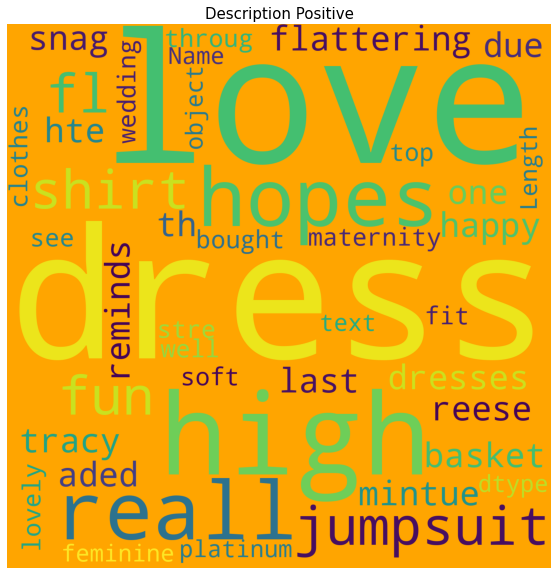

In [25]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(posite['text']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

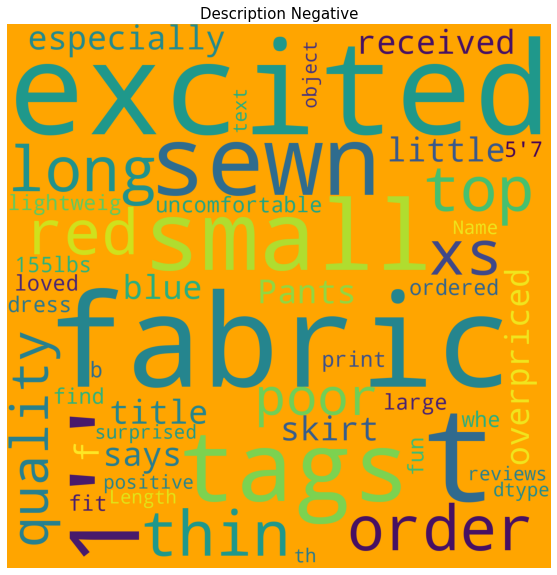

In [26]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['text']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [27]:
data = data.drop(['Age', 'Recommended', 'Feedback_Count', 'Division', 'Department', 'class'], axis = 1)

In [28]:
data.head()

,Title,text,Rating
2,Some major design flaws,I had such high hopes for this dress and reall...,1
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",1
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1


In [29]:
train, test = train_test_split(data, random_state = 0)

In [30]:
print( train.shape, test.shape)

(14746, 3) (4916, 3)


In [31]:
train.Rating.unique()

array([1, 0])

In [32]:
data = train

In [33]:
data.head()

,Title,text,Rating
22055,Gorgeous..runs small,Beautiful airy well made blouse. very flatteri...,1
4963,"Fit was small at waist, large up top! odd spots!",I was so disappointed in this top. the fabric ...,1
5631,So cute!,This romper is so dang cute. i normally wear a...,1
18977,Beautiful top,Very intricate detail with stitching. love the...,1
7538,Beautiful and comfortable,Absolutely love this top! yes it runs big and ...,1


In [34]:
data.drop(['Title'], axis = 1, inplace=True)

In [35]:
data.head()

,text,Rating
22055,Beautiful airy well made blouse. very flatteri...,1
4963,I was so disappointed in this top. the fabric ...,1
5631,This romper is so dang cute. i normally wear a...,1
18977,Very intricate detail with stitching. love the...,1
7538,Absolutely love this top! yes it runs big and ...,1


In [36]:
X = data.iloc[:, 0].values

In [37]:
X

array(['Beautiful airy well made blouse. very flattering and feminine. i normally wear a size 8 and ordered a 10 per the other reviews and i am glad i did! the fit id perfect.',
       'I was so disappointed in this top. the fabric blend was too thick for summer. the cut was wide across the shoulders, and very narrow and short through the waist. add in the odd splashes in the print, and it spelled disaster.\r\n\r\nsize: i tend to run between small and xs. i ordered xs. i\'m 5\'5" tall, 135 lbs, 34d, 35-29-37, narrow across shoulders, with short arms and long torso.\r\n\r\nfit: the cut was so wide across my narrow shoulders that it looked baggy and felt odd. however, the sleeves didn\'t sl',
       "This romper is so dang cute. i normally wear a m/l or 10/12. i took a medium in this though either size would probably have worked depending how loose you like it. it's not too sheer and the shorts aren't too short (i'm 5'9). my only complaint is the front toe came off on one side as i was t

In [38]:
X.shape

(14746,)

In [39]:
type(X)

numpy.ndarray

In [40]:
y = data.iloc[:, 1].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

In [42]:
X.shape

(2211,)

In [43]:
y.shape

(2211,)

In [44]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1]), array([  75, 2136]))

In [45]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [46]:
text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D"

In [47]:
text = clean_t(text)
text

' Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

In [48]:
import spacy

In [49]:
nlp = spacy.blank("en")

In [50]:
nlp

In [51]:
stop_words = sp.lang.en.STOP_WORDS

In [52]:
print(stop_words)

{'now', 'hereby', 'such', 'therein', 'you', 'hereupon', 'does', 'amount', 'so', 'various', 'empty', 'whenever', 'anyhow', 'herself', 'around', 'whole', 'than', 'i', 'yourselves', 'will', 'yet', 'nowhere', 'should', 'another', 'nobody', 'third', 'nothing', 'with', 'after', 'anyone', 'from', '‘re', 'well', 'any', 'next', 'wherein', 'latter', 'give', 'your', 'serious', 'although', 'becoming', "'m", 'namely', 'rather', 'some', 'then', 'via', 'front', 'six', 'put', 'onto', 'yours', 'none', '’s', '’d', 'himself', 'there', 'whereafter', 'else', 'per', 'eleven', 'done', 'eight', 'twenty', 'very', 'really', 'or', 'hers', 'this', 'same', 'please', 'alone', 'always', 'their', 'own', 'thereafter', 'myself', 'bottom', 'an', 'whatever', 'yourself', 'my', 'been', 'ourselves', 'nine', 'nor', 'see', 'move', 'regarding', 'thereupon', 'seems', 'someone', 'latterly', 'until', 'ours', 'he', 'whether', 'beside', 'do', 'on', 'each', 'indeed', 'did', "'s", 'already', 'as', 'somewhere', 'we', 'would', 'doing',

In [53]:
len(stop_words)

326

In [54]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
def clean_t2(t):
  tweet = t.lower()
  document = nlp(t)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [56]:
text2 = clean_t2(text)
text2

'  Awww s bummer You shoulda got David Carr Third Day D'

In [57]:
data_clean = [clean_t2(clean_t(t)) for t in X]

In [58]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

The skirt pretty s dark street pictures like colors better s super long hemmed decide reference m sweeping floor size medium given price m certain ll try times decide
I caught sneak peak beautiful dress local retailer instagram page ... excited arrived store love dress went black loved bold s ultra feminine flowy slip underneath prettiest embroidered print overlay light airy hemmed little lace peekaboo wonderful tried l xl xl fit dress little long wen
I bough blue like color style fabric bough necklace styled photo look s departure tailored clothing trying linen tops best cut linen fabric stretches fall nicely
After reading reviews stating dress potato sack look certainly concerns particularly petite hourglass athletic approaching decided t blue shade try lighter shade beautiful afraid wash darker hair olive toned skin let start saying blue beautiful rich looking velvet dimension ordinary velvet material lined tried
I t decide pants trying store soft beautiful blue color found bit smal

In [59]:
data_labels = y

In [60]:
data_labels[data_labels == 4] = 1

In [61]:
data_labels

array([1, 1, 0, ..., 1, 1, 1])

In [62]:
np.unique(data_labels)

array([0, 1])

# Tokenization

In [63]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [64]:
tokenizer.vocab_size

6156

In [65]:
print(tokenizer.subwords)

['dress_', 'I_', 's_', 't_', 'size_', 'fit_', 'like_', 'love_', 'm_', 'wear_', 'great_', 'small_', 'fabric_', 'color_', 'look_', 'This_', 'little_', 'ordered_', 'perfect_', 'soft_', 'flattering_', 'fits_', 'looks_', 'nice_', 'comfortable_', 'bit_', 'petite_', 'shirt_', 'bought_', 'large_', 'beautiful_', 'material_', 'cute_', 'xs_', 'quality_', 'long_', 'medium_', 'length_', 'sweater_', 'got_', 'waist_', 'usually_', 'tried_', 'pretty_', 'think_', 'work_', 'jeans_', 'retailer_', 'store_', 'colors_', 'don_', 'good_', 'way_', 'lbs_', ' ... ', 'cut_', 'pants_', 'black_', 'skirt_', 'right_', 'runs_', 'didn_', 'sleeves_', 'big_', 'short_', 'design_', 'summer_', 'purchased_', 'super_', 'online_', 'style_', 'true_', 'white_', 'wearing_', 'better_', 'tight_', 'blue_', 'sale_', 'looked_', 'loose_', 'perfectly_', 'high_', 'doesn_', 'price_', 'model_', 'light_', 'body_', 'jacket_', 'fall_', 'feel_', 'worn_', 'regular_', 'definitely_', 'person_', 'pattern_', 'try_', 'print_', 'saw_', 'pair_', 'arms_

In [66]:
ids = tokenizer.encode('i am happy')
ids

[1312, 5997, 9, 1079]

In [67]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [68]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[114, 270, 69, 20, 329, 22, 779, 612, 3, 11, 136, 309, 4932, 26, 2388]
[120, 237, 389, 50, 208, 159, 10, 3461, 33, 66, 241, 159, 10, 1318, 4697, 51, 4, 45, 111, 393, 4, 110, 299, 641, 1018, 40, 12, 478]
[2, 8, 3, 19, 103, 4183, 7, 4102, 2022, 67, 3, 32, 251, 90, 1249, 208, 67, 3, 17, 378, 1564, 112, 5, 5, 222, 29, 137, 5, 34, 6, 81, 9, 1918, 148, 581]
[114, 1, 29, 77, 519, 585, 77, 1651, 214, 1, 134, 185, 4674, 178, 289, 206, 1984, 146, 5039, 8, 8, 40, 78, 3446, 1801]
[2, 10, 47, 1544, 5728, 172, 3, 25, 227, 283]
[2, 27, 266, 5690, 328, 38, 376, 27, 23, 11, 38, 19, 86, 135, 292, 146, 1273, 449, 292, 1524, 18, 34, 27, 17, 80, 54, 89, 23, 11, 1032, 433, 178, 1814, 1825, 89, 1000, 877]
[2, 890, 18, 92, 188, 80, 6, 188, 2583, 38, 60, 1073, 55, 79, 11, 582, 367, 145, 7, 113, 786, 75, 27, 18, 188, 6012, 55, 997, 116, 211, 27, 121, 1, 6, 87, 75, 220, 506, 324, 313, 23, 582, 2959, 4911, 264, 31, 442, 13, 999]
[1583, 11, 20, 205, 11, 853, 180, 484, 679, 1701, 63, 1510, 51, 4, 1701, 1568]
[114, 

# Padding

In [69]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

58

In [70]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [71]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[  16  136  799  282  193    8   35   11   14   83    4 4982   42   10
    5   18    5   22  517    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   2    7  202  408    3   53   36   14   44   66 2607   38  102   15
  634  262 1159   27  875  865    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   2   68 1133 1299  128   14  852    9 1018   54   68   12    6   72
    5    8   66  901 3987 1831 1133 1109 2906 1004   66 5421   60  325
 1827   48 5664  626 1799  338  290  275 3469  347 6008    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[  16   31  136  110 4750   39   32  131   50   98  208  388   43 3077
   27 2584    6   81  148   84 3896 3209 

# Division of database into training and testing

In [72]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [73]:
train_inputs[0]

array([5871,    4, 1410,   88,  288,  131,  141,   97,   97, 3735, 2561,
          8,   48,  782,  392, 5059,   37,  392,   37,   22,  228,    7,
       5551,   71, 2012,   43,   12,  274,   49,   12,   12,  143,  716,
          6,   12,    7, 1913, 2763,   90,  298,  113,  199,  373,   10,
       1644,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [74]:
train_inputs.shape

(1547, 58)

In [75]:
train_labels.shape

(1547,)

In [76]:
test_inputs.shape

(664, 58)

In [77]:
test_labels.shape

(664,)

# Model building

In [78]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)
    self.embedding = layers.Embedding(vocab_size, emb_dim)
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')
    self.pool = layers.GlobalMaxPool1D()
    
#estrutura da rede neural
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Training

In [79]:
vocab_size = tokenizer.vocab_size
vocab_size

6156

In [80]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [81]:
dropout_rate = 0.2
nb_epochs = 5  

In [82]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [83]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# Para salvar o arquivo quando fazemos o treinamento em grande escala;

#checkpoint_path = "./"
#ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
#ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
#if ckpt_manager.latest_checkpoint:
 # ckpt.restore(ckpt_manager.latest_checkpoint)
  #print('Latest checkpoint restored')

In [85]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
#ckpt_manager.save()

2021-11-10 01:06:28.074106: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
22/22 [==============================] - 4s 99ms/step - loss: 0.2356 - accuracy: 0.9296 - val_loss: 0.2032 - val_accuracy: 0.9613
Epoch 2/5
22/22 [==============================] - 2s 107ms/step - loss: 0.1426 - accuracy: 0.9670 - val_loss: 0.1499 - val_accuracy: 0.9613
Epoch 3/5
22/22 [==============================] - 2s 85ms/step - loss: 0.1134 - accuracy: 0.9670 - val_loss: 0.1430 - val_accuracy: 0.9613
Epoch 4/5
22/22 [==============================] - 2s 88ms/step - loss: 0.0855 - accuracy: 0.9670 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 5/5
22/22 [==============================] - 2s 86ms/step - loss: 0.0557 - accuracy: 0.9670 - val_loss: 0.1386 - val_accuracy: 0.9613


# Model Evaluation

In [86]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

11/11 [==============================] - 0s 21ms/step - loss: 0.1705 - accuracy: 0.9654
[0.17050646245479584, 0.9653614163398743]


In [87]:
y_pred_test = Dcnn.predict(test_inputs)

In [88]:
y_pred_test

array([[0.9947845 ],
       [0.9982227 ],
       [0.9999199 ],
       [0.99801046],
       [0.9943459 ],
       [0.9997207 ],
       [0.99990654],
       [0.99992573],
       [0.98984873],
       [0.9889439 ],
       [0.96631026],
       [0.99650955],
       [0.99973273],
       [0.9930185 ],
       [0.99753404],
       [0.99908984],
       [0.9362791 ],
       [0.9610081 ],
       [0.9982814 ],
       [0.99875116],
       [0.9951415 ],
       [0.9906832 ],
       [0.9997444 ],
       [0.9932555 ],
       [0.9755713 ],
       [0.9976021 ],
       [0.9977852 ],
       [0.99744177],
       [0.91317356],
       [0.9998076 ],
       [0.9966973 ],
       [0.9903095 ],
       [0.99546766],
       [0.9976233 ],
       [0.99826455],
       [0.9965179 ],
       [0.99087983],
       [0.99476296],
       [0.9990582 ],
       [0.9912137 ],
       [0.9924202 ],
       [0.99192303],
       [0.9998876 ],
       [0.9988539 ],
       [0.99333817],
       [0.9972837 ],
       [0.9934025 ],
       [0.995

In [89]:
y_pred_test = (y_pred_test > 0.5)

In [90]:
y_pred_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [91]:
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[  0,  23],
       [  0, 641]])

<AxesSubplot:>

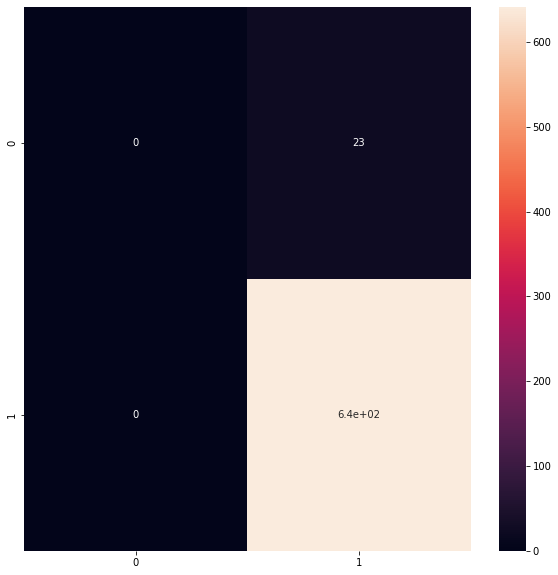

In [93]:
sns.heatmap(cm, annot=True)

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

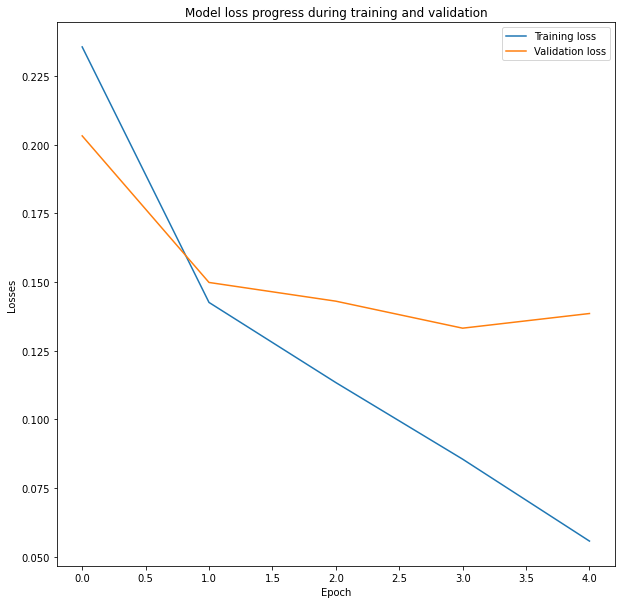

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

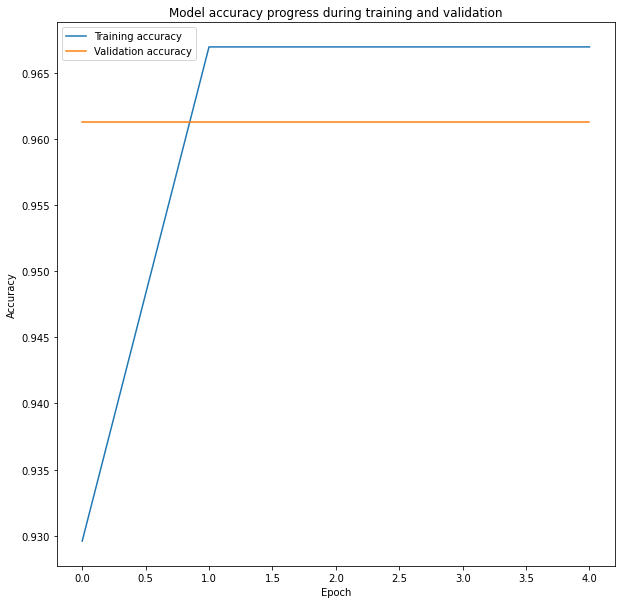

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

# **Conclusion**

Initially, at the beginning of the study I used the Recommended attribute, which has the values ​​0 and 1, I imagined that if the person recommends there are positive comments, otherwise it will be negative, but the prediction of the algorithm based on this attribute in order to identify negative sentences was not very clonclusive .

With an unsatisfactory result from Recommended, I decided to use the Rating attribute in the database for the development of the algorithm, which has grades from 1 to 5, I used it as parameters if >= 2 will be positive otherwise it will be negative, the result was satisfactory as we can see, the hit level was more satisfactory.

Such a change was also noted in the word cloud.

The fact that the person recommends it or not does not mean that they made a negative or positive comment, they just didn't recommend it, it's just two options, do you recommend? not recommend? and ready, objectively!

But when it opens up the possibility for the customer to evaluate with grades, there is a more subjective side to the comments, "feeling", it makes the customer think more about how he or she felt about the product, if he was not satisfied or not with the product, as he cannot give a score of 0, he ends up giving a 1, which would be the minimum, and the fact of having to think about how he felt about the product seeks to express his feelings about the product through comments and why the note.